<a href="https://colab.research.google.com/github/sergiorocha-tj/Codigos/blob/main/Erros/M%C3%A9todos/Solu%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# **Problemas de Importação - UTF-8**
**ERRO** Ao ler um arquivo, com a informação de erro de codificação **UTF-8**. No meu caso, a importação era de um arquivo **ANSI**.

O link do vídeo trás mais informações:
https://www.youtube.com/watch?v=xhqLNNJoOms

E o link abaixo trás algumas sugestõe de pode ser resolvido o problema.
https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

 Achei interessante a menção da Biblioteca **chardet**, que possui codec's para tratar problemas de formação de texto.

In [5]:
df = pd.read_csv("/content/TA_PRECO_MEDICAMENTO.csv", encoding="ISO-8859-1", sep=";") 

In [6]:
df.head()

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,PF 12%,PF 17%,PF 17% ALC,"PF 17,5%","PF 17,5% ALC",PF 18%,PF 18% ALC,PF 20%,PMC 0%,PMC 12%,PMC 17%,PMC 17% ALC,"PMC 17,5%","PMC 17,5% ALC",PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,5.205009e+14,5.760051e+10,7896210500354,-,-,TALCO ALÍVIO,TALQUEIRA C/ 100 G,D10A - ANTIACNEICOS TÓPICOS,Similar,Regulado,"5,04","5,65","6,53","6,98","6,08","7,03","6,11","7,08","6,15","7,29","7,58","8,72","9,30","8,41","9,37","8,45","9,43","8,50","9,70",Não,Não,Não,Não,NaN,Negativa,Não,Tarja -(*)
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,5.309171e+14,1.002001e+12,7896116871497,-,-,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,G3A4 - PREPARAÇÕES CONTRACEPTIVAS TRIFÁSICAS,Similar,Regulado,"96,83","108,45","125,32","134,01","116,66","134,95","117,37","135,90","118,09","139,83","145,48","167,40","178,63","161,28","179,84","162,26","181,06","163,25","186,12",Não,Não,Não,Não,NaN,Negativa,Não,Tarja Vermelha(*)
2,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,5.255004e+14,1.002900e+12,7897337705905,-,-,CO-RENITEC,"20 MG + 12,5 MG COM CT BL AL/AL X 30",C9B1 - INIBIDORES DA ECA ASSOCIADOS A ANTI-HIP...,Novo,Regulado,"43,76","43,76","49,73","52,72","52,72","53,04","53,04","53,37","53,37","54,70","60,50","68,75","72,88","72,88","73,32","73,32","73,78","73,78","75,62",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
3,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,5.255004e+14,1.002900e+12,7897337705912,-,-,CO-RENITEC,10 MG + 25 MG COM CT BL AL/AL X 30,C9B1 - INIBIDORES DA ECA ASSOCIADOS A ANTI-HIP...,Novo,Regulado,"28,74","28,74","32,66","34,63","34,63","34,84","34,84","35,05","35,05","35,93","39,73","45,15","47,87","47,87","48,16","48,16","48,45","48,45","49,67",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,5.255020e+14,1.002900e+12,7897337706575,-,-,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,"44,67","44,67","50,76","53,82","53,82","54,15","54,15","54,48","54,48","55,84","61,75","70,17","74,40","74,40","74,86","74,86","75,32","75,32","77,20",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha


In [7]:
df.columns

Index(['SUBSTÂNCIA', 'CNPJ', 'LABORATÓRIO', 'CÓDIGO GGREM', 'REGISTRO',
       'EAN 1', 'EAN 2', 'EAN 3', 'PRODUTO', 'APRESENTAÇÃO',
       'CLASSE TERAPÊUTICA', 'TIPO DE PRODUTO (STATUS DO PRODUTO)',
       'REGIME DE PREÇO', 'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%',
       'PF 17% ALC', 'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC',
       'PF 20%', 'PMC 0%', 'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%',
       'PMC 17,5% ALC', 'PMC 18%', 'PMC 18% ALC', 'PMC 20%',
       'RESTRIÇÃO HOSPITALAR', 'CAP', 'CONFAZ 87', 'ICMS 0%',
       'ANÁLISE RECURSAL',
       'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
       'COMERCIALIZAÇÃO 2020', 'TARJA'],
      dtype='object')

## **CONVERTER COLUNA DATA FRAME**
Os recursos abaixo vieram do vídeo:
https://www.youtube.com/watch?v=MVd1cs7TDgA&list=PL5TJqBvpXQv6SSsEgQrNwpOLTupXPuiMQ&index=1&t=80s

Ao se tentar realizar cálculos matemáticos (Média, Porcentagem), retornava erro por causa das Colunas.

## **.info()**
Mostra qual é o Dtype da Coluna

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15117 entries, 0 to 15116
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   SUBSTÂNCIA                                             15117 non-null  object 
 1   CNPJ                                                   15116 non-null  object 
 2   LABORATÓRIO                                            15116 non-null  object 
 3   CÓDIGO GGREM                                           15116 non-null  float64
 4   REGISTRO                                               15116 non-null  float64
 5   EAN 1                                                  15116 non-null  object 
 6   EAN 2                                                  15116 non-null  object 
 7   EAN 3                                                  15116 non-null  object 
 8   PRODUTO                                       

Ao se executar o **.mean**, numa coluna de valores, retorna erro.

In [12]:
df["PF Sem Impostos"].mean()

TypeError: ignored

Necessário executar o **.astype(float64)**, para converter a coluna em formato float.

In [15]:
df["PF Sem Impostos"].astype("float64")

ValueError: ignored

Como o formato da coluna acompanha o formato americano com **","**, precisamos converter o **","** para **"."**, como mostra o comando abaixo.

In [16]:
df["PF Sem Impostos"] = df["PF Sem Impostos"].apply(lambda x: str(x).replace(",", "."))

Agora sim, verificamos que os dados estão convertidos.

In [17]:
df["PF Sem Impostos"]

0         5.04
1        96.83
2        43.76
3        28.74
4        44.67
         ...  
15112    44.59
15113    35.46
15114    54.21
15115    82.53
15116      nan
Name: PF Sem Impostos, Length: 15117, dtype: object

Podemos executar agora o .astype(float64), para converter a coluna em formato float.

In [19]:
df["PF Sem Impostos"] = df["PF Sem Impostos"].astype("float64")

Ao realizarmos o método **(.mean)**, conseguimos executar o cálculo, porque a coluna está no formato float.

In [21]:
df['PF Sem Impostos'].mean()

4523.1109016935925

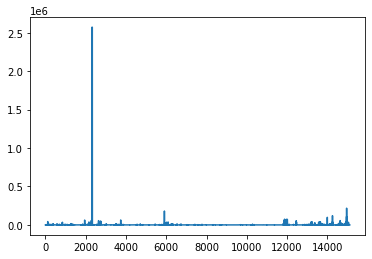

In [24]:
df["PF Sem Impostos"].plot()